In [1]:
import csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import tree

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Считываем данные с тренеровочного файла
trainCsvFile = pd.read_csv('application_train.csv')
print('Size of train file (rows,cols): ', trainCsvFile.shape)
trainCsvFile.head()

Size of train file (rows,cols):  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
#считываем тестовые данные
testCsvFile = pd.read_csv('application_test.csv')
print('Size of test file (rows,cols): ', testCsvFile.shape)
testCsvFile.head()

Size of test file (rows,cols):  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#Делаем анализ данных train


#сколько кредитов выплачено/не выплаченоно train
#0-выплачено / 1-не выплачено
trainCsvFile['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

<AxesSubplot:xlabel='TARGET', ylabel='count'>

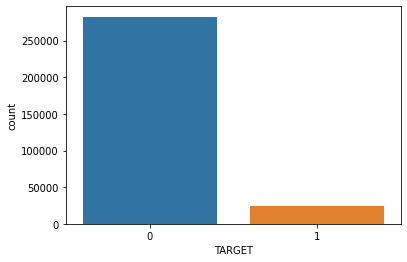

In [5]:
#целые значения train
sns.countplot(trainCsvFile['TARGET'])
#по гистрограмме видно, что данные не сбалансированы

In [6]:
# Кол-во столбцов каждого типа
trainCsvFile.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [7]:
trainCsvFile.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
#проанализируем потери данных
def missing_values_table(param):
        # Всего
        mis_val = param.isnull().sum()
        
        # Процентаж
        mis_val_percent = 100 * param.isnull().sum() / len(param)
        
        # Таблица результатов
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Названия столбцов
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Потерянное кол-во', 1 : '% от всех значений'})
        
        # Сортировка по убыванию процентажа
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от всех значений', ascending=False).round(1)
        
        # Вывод всей инфы
        print ("Выбранный файл имеет " + str(param.shape[1]) + " кол-во(-а) колонок.\n"      
            "Из них " + str(mis_val_table_ren_columns.shape[0]) +
              " колонки(-ок), в которых были утеряны данные.")
        
        #Возвращаем инфу о упущенный ячейках
        return mis_val_table_ren_columns

In [9]:
missing_values = missing_values_table(trainCsvFile)
missing_values.head(40)

Выбранный файл имеет 122 кол-во(-а) колонок.
Из них 67 колонки(-ок), в которых были утеряны данные.


,Потерянное кол-во,% от всех значений
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [10]:
#как видим, есть много потерь:
#там, где потерь больше, чем 20-25% удалим
#в остальных заполним, как среднее значение

In [11]:
def delete_high_missing_values( missing_values):
    for i in range(len(missing_values)):
        if (missing_values.iloc[i,1] > 25.):
            trainCsvFile.drop(missing_values.index[i], axis='columns', inplace=True)
            testCsvFile.drop(missing_values.index[i], axis='columns', inplace=True)

delete_high_missing_values( missing_values)

In [12]:
print('Size trainCsvFile: ', trainCsvFile.shape)
trainCsvFile.head()

Size trainCsvFile:  (307511, 72)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
missing_values = missing_values_table(trainCsvFile)
missing_values.head(40)

Выбранный файл имеет 72 кол-во(-а) колонок.
Из них 17 колонки(-ок), в которых были утеряны данные.


,Потерянное кол-во,% от всех значений
EXT_SOURCE_3,60965,19.8
AMT_REQ_CREDIT_BUREAU_YEAR,41519,13.5
AMT_REQ_CREDIT_BUREAU_QRT,41519,13.5
AMT_REQ_CREDIT_BUREAU_MON,41519,13.5
AMT_REQ_CREDIT_BUREAU_WEEK,41519,13.5
AMT_REQ_CREDIT_BUREAU_DAY,41519,13.5
AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.5
NAME_TYPE_SUITE,1292,0.4
DEF_60_CNT_SOCIAL_CIRCLE,1021,0.3
OBS_60_CNT_SOCIAL_CIRCLE,1021,0.3


In [14]:
# Сделаем замену категориальных значений на дискретные
# в отдельную колонку

# Для категориальных переменных с двумя уникальными категориями используем LabelEncoder для 2 и более one-hot encoding
le = LabelEncoder()
le_count = 0

# Итерация по столбцам
for col in trainCsvFile:
    if trainCsvFile[col].dtype == 'object':
        # Если имеем 2 или менее уникальных категориальных значний
        if len(list(trainCsvFile[col].unique())) <= 2:
            # тренировка на первом файле
            le.fit(trainCsvFile[col])
            # преобразование и тренировачных и тестовых значений
            trainCsvFile[col] = le.transform(trainCsvFile[col])
            testCsvFile[col] = le.transform(testCsvFile[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d столбца(-ов) были закодированы.' % le_count)

# one-hot encoding
trainCsvFile = pd.get_dummies(trainCsvFile)
testCsvFile = pd.get_dummies(testCsvFile)

print('Размерность тренировачных данных: ', trainCsvFile.shape)
print('Размерность тестовых данных: ', testCsvFile.shape)

3 столбца(-ов) были закодированы.
Размерность тренировачных данных:  (307511, 164)
Размерность тестовых данных:  (48744, 160)


In [15]:
#остальное заполняем средним значением
trainCsvFile = trainCsvFile.fillna(value=trainCsvFile.mean())

testCsvFile = testCsvFile.fillna(value=testCsvFile.mean())

missing_values = missing_values_table(trainCsvFile)
missing_values.tail(30)

Выбранный файл имеет 164 кол-во(-а) колонок.
Из них 0 колонки(-ок), в которых были утеряны данные.


,Потерянное кол-во,% от всех значений


In [16]:
#выравнивание таблиц train и test файлов
train_labels = trainCsvFile['TARGET']

#удаляем столбы из train файла, которых нет в test файле
trainCsvFile, testCsvFile = trainCsvFile.align(testCsvFile, join = 'inner', axis = 1)

# возвращаем таргеты
trainCsvFile['TARGET'] = train_labels

print('Размерность тренировачных данных: ', trainCsvFile.shape)
print('Размерность тестовых данных: ', testCsvFile.shape)

Размерность тренировачных данных:  (307511, 161)
Размерность тестовых данных:  (48744, 160)


In [17]:
#удаляем ненужные поля "SK_ID_CURR"

reduced_testCsvFile = testCsvFile.copy()

trainCsvFile.drop('SK_ID_CURR', axis='columns', inplace=True)
reduced_trainCsvFile = trainCsvFile.copy()

reduced_testCsvFile.drop('SK_ID_CURR', axis='columns', inplace=True)

In [18]:
#построим матрицу корреляции для всех столбцов
correlation_matrix = trainCsvFile.corr()

In [19]:
#прорисовка матрицы
# mask = np.array(correlation_matrix)
# mask[np.tril_indices_from(mask)] = False
# fig, ax = plt.subplots(figsize=(40, 40))
# ax = sns.heatmap(correlation_matrix, mask=mask, vmax=0.6, square=True, annot=True)

In [20]:
#теперь следует избавиться от высокой корреляции
#пройдемся по матрице корреляции и выпишем колонки, в которых высокая корреляция
#для дальнейшего удаления


train_columns = list(reduced_trainCsvFile)
train_columns
high_correlation_arr = list()
#high_correlation_arr = defaultdict(list)
for i in range (len(correlation_matrix)):
    for j in range (i+1,len(correlation_matrix)):
        if correlation_matrix[train_columns[i]][train_columns[j]]>0.8:
            high_correlation_arr.append(train_columns[j])
            print(train_columns[j])

CNT_FAM_MEMBERS
AMT_GOODS_PRICE
NAME_INCOME_TYPE_Pensioner
ORGANIZATION_TYPE_XNA
REGION_RATING_CLIENT_W_CITY
LIVE_REGION_NOT_WORK_REGION
LIVE_CITY_NOT_WORK_CITY
OBS_60_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
ORGANIZATION_TYPE_XNA


In [21]:
#Проверяем колонки
print(len(high_correlation_arr))
#Убираем дубликаты
high_correlation_arr = list(set(high_correlation_arr))
print(len(high_correlation_arr))
high_correlation_arr

10
9


['ORGANIZATION_TYPE_XNA',
 'LIVE_CITY_NOT_WORK_CITY',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'CNT_FAM_MEMBERS',
 'REGION_RATING_CLIENT_W_CITY',
 'AMT_GOODS_PRICE',
 'NAME_INCOME_TYPE_Pensioner',
 'LIVE_REGION_NOT_WORK_REGION',
 'DEF_60_CNT_SOCIAL_CIRCLE']

In [22]:
#теперь избавляемся от этих данных
for i in high_correlation_arr:
    trainCsvFile.drop(i, axis='columns', inplace=True)
    reduced_testCsvFile.drop(i, axis='columns', inplace=True)
    testCsvFile.drop(i, axis='columns', inplace=True)



In [23]:
train_features = trainCsvFile.copy()
train_features.drop('TARGET', axis='columns', inplace=True)
train_features.head()

,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,0,0,1,0,202500.0,406597.5,24700.5,0.018801,-9461,-637,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,270000.0,1293502.5,35698.5,0.003541,-16765,-1188,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,67500.0,135000.0,6750.0,0.010032,-19046,-225,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,135000.0,312682.5,29686.5,0.008019,-19005,-3039,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,121500.0,513000.0,21865.5,0.028663,-19932,-3038,...,0,0,0,0,0,0,0,0,0,0


In [24]:
#делаем разбиение тренировочного файла
x_train, x_test, y_train, y_test = train_test_split(train_features, trainCsvFile["TARGET"], test_size=0.2)

In [25]:
# Класифицируем наши проанализированные данные с помощью DecisionTree
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(x_train, y_train)
# tree.plot_tree(clf)

DecisionTreeClassifier(max_depth=6)

In [26]:
test_preds = clf.predict_proba(x_test)
test_preds = test_preds[:, 1]
train_preds = clf.predict_proba(x_train)
train_preds = train_preds[:, 1]

lr_auc = roc_auc_score(y_test, test_preds)
tr_auc = roc_auc_score(y_train, train_preds)

print('тренировачный: ROC AUC=%f' % (tr_auc))
print('тестовый     : ROC AUC=%f' % (lr_auc))

end_test_preds = clf.predict_proba(reduced_testCsvFile)
end_test_preds = end_test_preds[:, 1]
print(end_test_preds)

 # Make the submission dataframe
submission = pd.DataFrame({'SK_ID_CURR': testCsvFile['SK_ID_CURR'], 'TARGET': end_test_preds})
submission.to_csv('submission1.csv', index = False)


тренировачный: ROC AUC=0.719476
тестовый     : ROC AUC=0.713684
[0.06421105 0.17301038 0.02355256 ... 0.15338346 0.06902742 0.15338346]


In [27]:
#проведём дополнительный анализ (на числовых данных)

In [ ]:
#Считываем данные с тренеровочного файла
trainFile = pd.read_csv('application_train.csv')
print('Size of train file (rows,cols): ', trainFile.shape)
trainFile.head()

In [ ]:
#Считываем данные с тестового файла
testFile = pd.read_csv('application_test.csv')
print('Size of train file (rows,cols): ', testFile.shape)
testFile.head()

In [ ]:
# Кол-во столбцов каждого типа
trainFile.dtypes.value_counts()

In [ ]:
numerical_features= trainFile.select_dtypes(include = ['float64', 'int64']).columns
numerical_features

In [ ]:
#создаем новыq массив
num_train_data = trainFile[numerical_features]
numerical_features = numerical_features.drop('TARGET')
num_test_data = testFile[numerical_features]
num_train_data.head()

In [ ]:
missing_values = missing_values_table(num_train_data)
missing_values.tail(30)

In [ ]:
#обрабатываем данные с пропущенными данными
#заполним их средними значениями
num_train_data = num_train_data.fillna(value=num_train_data.mean())
num_test_data = num_test_data.fillna(value=num_test_data.mean())
missing_values = missing_values_table(num_train_data)
missing_values.tail(30)

In [ ]:
#прорисуем гистрограммы
# num_train_data[numerical_features].hist(figsize=(100, 100), bins=30)

In [ ]:
#удаляем ненужные поля "SK_ID_CURR"

reduced_num_test_data = num_test_data.copy()

num_train_data.drop('SK_ID_CURR', axis='columns', inplace=True)
reduced_num_train_data = num_train_data.copy()

reduced_num_test_data.drop('SK_ID_CURR', axis='columns', inplace=True)

In [ ]:
#построим матрицу корреляции
correlation_matrix = num_train_data.corr()

In [ ]:
#прорисовка матрицы
# mask = np.array(correlation_matrix)
# mask[np.tril_indices_from(mask)] = False
# fig, ax = plt.subplots(figsize=(40, 40))
# ax = sns.heatmap(correlation_matrix, mask=mask, vmax=0.6, square=True, annot=True)

In [ ]:
#теперь следует избавиться от высокой корреляции
#пройдемся по матрице корреляции и выпишем колонки, в которых высокая корреляция
#для дальнейшего удаления


train_columns = list(num_train_data)
train_columns
high_correlation_arr = list()
#high_correlation_arr = defaultdict(list)
for i in range (len(correlation_matrix)):
    for j in range (i+1,len(correlation_matrix)):
        if correlation_matrix[train_columns[i]][train_columns[j]]>0.85:
            high_correlation_arr.append(train_columns[j])
            print(train_columns[j])

In [ ]:
#Проверяем колонки
print(len(high_correlation_arr))
#Убираем дубликаты
high_correlation_arr = list(set(high_correlation_arr))
print(len(high_correlation_arr))
high_correlation_arr

In [ ]:
#теперь избавляемся от этих данных
for i in high_correlation_arr:
    num_train_data.drop(i, axis='columns', inplace=True)
    reduced_num_test_data.drop(i, axis='columns', inplace=True)
    num_test_data.drop(i, axis='columns', inplace=True)

In [ ]:
correlation_matrix = num_train_data.corr()
# mask = np.array(correlation_matrix)
# mask[np.tril_indices_from(mask)] = False
# fig, ax = plt.subplots(figsize=(40, 40))
# ax = sns.heatmap(correlation_matrix, mask=mask, vmax=0.6, square=True, annot=True)

In [ ]:
train_features = num_train_data.copy()
train_features.drop('TARGET', axis='columns', inplace=True)
train_features.head()

In [ ]:
#делаем разбиение тренировочного файла
x_train, x_test, y_train, y_test = train_test_split(train_features, trainFile["TARGET"], test_size=0.2)

In [ ]:
# Класифицируем наши проанализированные данные с помощью DecisionTree
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(x_train, y_train)
tree.plot_tree(clf)

In [ ]:
test_preds = clf.predict_proba(x_test)
test_preds = test_preds[:, 1]
train_preds = clf.predict_proba(x_train)
train_preds = train_preds[:, 1]

lr_auc = roc_auc_score(y_test, test_preds)
tr_auc = roc_auc_score(y_train, train_preds)

print('тренировачный: ROC AUC=%f' % (tr_auc))
print('тестовый     : ROC AUC=%f' % (lr_auc))

end_test_preds = clf.predict_proba(reduced_num_test_data)
end_test_preds = end_test_preds[:, 1]
print(end_test_preds)

 # Make the submission dataframe
submission = pd.DataFrame({'SK_ID_CURR': testCsvFile['SK_ID_CURR'], 'TARGET': end_test_preds})
submission.to_csv('submission2.csv', index = False)
